<a href="https://colab.research.google.com/github/Mousavisp/DL-w-PyTorch-4-Medical-Image/blob/main/5.%20ANN%20Artificial%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import torch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

# PyTorch Gradients

In [20]:
x = torch.tensor(2.0, requires_grad=True)

In [21]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print(y)
type(y)

tensor(63., grad_fn=<AddBackward0>)


torch.Tensor

backprop

In [22]:
y.backward()

slope of x=2, f(x)=63 is x.grad

(putting x=2 in f'(x) gives x.grad)

In [23]:
x.grad

tensor(93.)

In [24]:
x = torch.tensor([[1.,2.,3.],[3.,2.,1.]],requires_grad=True)

In [25]:
y = 3*x + 2
z = 2*y**2

print(y)
print(z)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)
tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [26]:
out = z.mean()
print(out)

tensor(140., grad_fn=<MeanBackward0>)


performing back-propagation to find the gradient of x with respect to $out$

In [27]:
out.backward()

solving the derivative of $z$ with the **chain rule**: $f(g(x)) = f'(g(x))g'(x)$

In [28]:
x.grad

tensor([[10., 16., 22.],
        [22., 16., 10.]])

# Linear Model

In [29]:
X = torch.linspace(1,50,50).reshape(-1,1)
e = torch.randint(-7,8, X.shape, dtype=torch.float)
y = 2*X + 3 + e

We can't plot a torch, so we need to change it to np

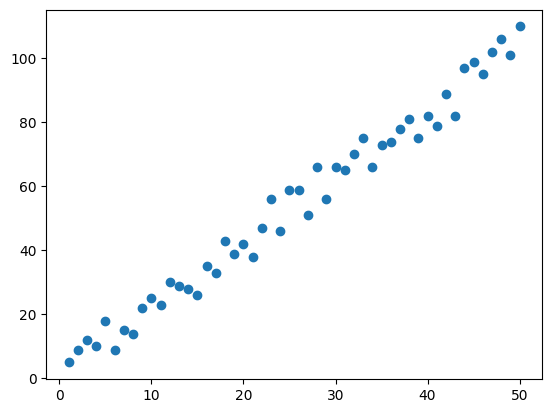

In [30]:
plt.scatter(X.numpy(), y.numpy());

In [31]:
model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.6981]], requires_grad=True)
Parameter containing:
tensor([-0.1619], requires_grad=True)


In [32]:
class Model(nn.Module):

    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)

    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [33]:
model = Model(1,1)

for name,param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.15809381008148193
linear.bias 	 -0.34273815155029297


In [34]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

In [35]:
epochs = 50
losses = list()

for i in range(epochs):
    i += 1
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    losses.append(loss)
    print(f"epoch {i}, loss: {loss.item()}, weight: {model.linear.weight.item()}, bias: {model.linear.bias.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 1, loss: 3318.5400390625, weight: 0.15809381008148193, bias: -0.34273815155029297
epoch 2, loss: 1722.201416015625, weight: 3.5244061946868896, bias: -0.2417154610157013
epoch 3, loss: 898.0693969726562, weight: 1.1056079864501953, bias: -0.3125767409801483
epoch 4, loss: 472.5983581542969, weight: 2.8435003757476807, bias: -0.259937584400177
epoch 5, loss: 252.94261169433594, weight: 1.5947470664978027, bias: -0.2960362136363983
epoch 6, loss: 139.54176330566406, weight: 2.4919443130493164, bias: -0.2683762311935425
epoch 7, loss: 80.99644470214844, weight: 1.8472431898117065, bias: -0.28652864694595337
epoch 8, loss: 50.77108383178711, weight: 2.3104195594787598, bias: -0.27176499366760254
epoch 9, loss: 35.166351318359375, weight: 1.9775692224502563, bias: -0.28065285086631775
epoch 10, loss: 27.109729766845703, weight: 2.2166762351989746, bias: -0.27254757285118103
epoch 11, loss: 22.94988250732422, weight: 2.044822931289673, bias: -0.2766529619693756
epoch 12, loss: 20.80181

In [36]:
for i in range(epochs):
    losses[i]=losses[i].detach().numpy()

Text(0, 0.5, 'loss')

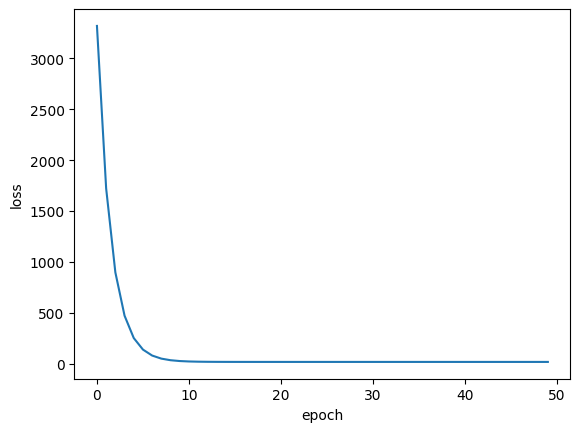

In [37]:
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')

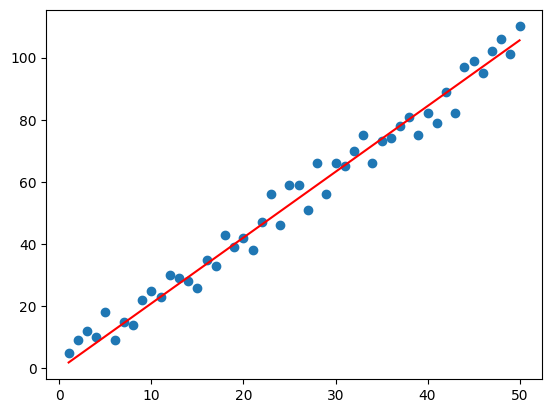

In [38]:
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*X + current_bias

plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), predicted_y, 'r')

# Fully Connected NN

In [39]:
class Model(nn.Module):

    def __init__(self,in_features=4,h1=8,h2=10,out_features=3):

        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)


    def forward(self,x):

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [40]:
model = Model()

In [41]:
df = pd.read_csv('iris.csv')

In [42]:
df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
71,6.1,2.8,4.0,1.3,1.0
36,5.5,3.5,1.3,0.2,0.0
96,5.7,2.9,4.2,1.3,1.0


In [43]:
X = df.drop('target',axis=1).values
y = df['target'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [51]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)
testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [52]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [53]:
epochs = 250
losses = list()

for i in range(epochs):
    # Forward Propagation
    y_pred = model.forward(X_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss)

    if i % 10 == 0:
        print(f"Epoch: {i} Loss: {loss}")

    # Back Propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 0.0511196032166481
Epoch: 10 Loss: 0.05148964747786522
Epoch: 20 Loss: 0.05169159173965454
Epoch: 30 Loss: 0.0504729263484478
Epoch: 40 Loss: 0.050430793315172195
Epoch: 50 Loss: 0.05030197277665138
Epoch: 60 Loss: 0.05016238987445831
Epoch: 70 Loss: 0.050041887909173965
Epoch: 80 Loss: 0.04993065819144249
Epoch: 90 Loss: 0.04981301352381706
Epoch: 100 Loss: 0.04969725385308266
Epoch: 110 Loss: 0.04958049952983856
Epoch: 120 Loss: 0.049463845789432526
Epoch: 130 Loss: 0.04934743791818619
Epoch: 140 Loss: 0.04923142492771149
Epoch: 150 Loss: 0.0491163395345211
Epoch: 160 Loss: 0.04900229722261429
Epoch: 170 Loss: 0.04888971894979477
Epoch: 180 Loss: 0.04877891391515732
Epoch: 190 Loss: 0.04867007955908775
Epoch: 200 Loss: 0.048563484102487564
Epoch: 210 Loss: 0.048459384590387344
Epoch: 220 Loss: 0.04835795611143112
Epoch: 230 Loss: 0.048259470611810684
Epoch: 240 Loss: 0.04816397652029991


In [48]:
for i in range(epochs):
    losses[i]=losses[i].detach().numpy()

Text(0, 0.5, 'Loss')

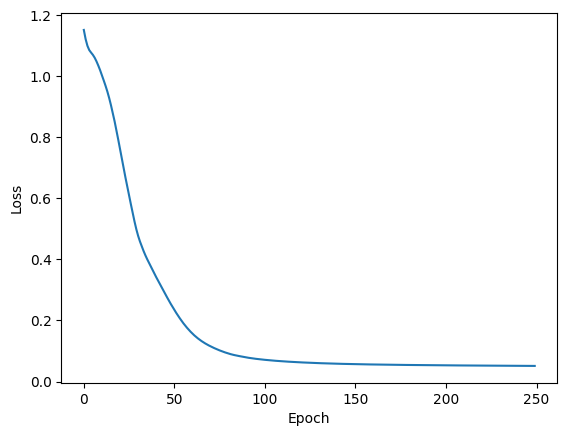

In [49]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [58]:
correct = 0
with torch.no_grad():
    for idx,data in enumerate(X_test):
        y_val = model.forward(data)
        if y_val.argmax().item() == y_test[idx]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')


30 out of 30 = 100.00% correct


In [59]:
torch.save(model.state_dict(), 'Iris_Model.pt')

In [62]:
new_model = Model()
new_model.load_state_dict(torch.load('Iris_Model.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)